In [5]:
!nvidia-smi

Tue Dec 26 13:20:51 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
!pip install ultralytics

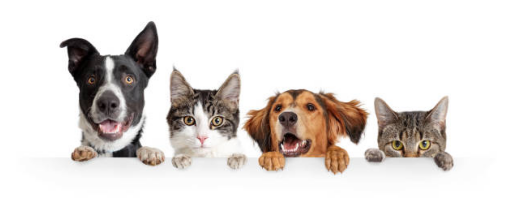

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO
from IPython.display import display, Image
img = mpimg.imread('/content/dc.jpeg')
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [8]:
#detection
!yolo task=detect mode=predict model=yolov8n.pt source="/content/dc.jpeg"

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dc.jpeg: 256x640 2 cats, 2 dogs, 439.0ms
Speed: 9.9ms preprocess, 439.0ms inference, 2316.6ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


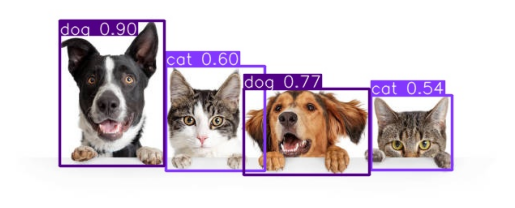

In [9]:
img = mpimg.imread('/content/runs/detect/predict/dc.jpeg')
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [10]:
#segmentation
!yolo task=segment mode=predict model=yolov8n-seg.pt source="/content/dc.jpeg"

100% 6.73M/6.73M [00:00<00:00, 89.9MB/s]
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

image 1/1 /content/dc.jpeg: 256x640 2 cats, 2 dogs, 143.0ms
Speed: 2.7ms preprocess, 143.0ms inference, 553.3ms postprocess per image at shape (1, 3, 256, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


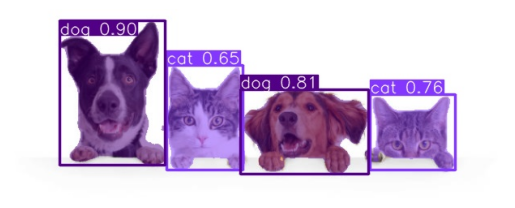

In [11]:
img = mpimg.imread('/content/runs/segment/predict/dc.jpeg')
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [12]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
%cd /content/drive/MyDrive/YOLOv8

/content/drive/MyDrive/YOLOv8


In [17]:
%cd /content/drive/MyDrive/YOLOv8
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=125 imgsz=224 plots=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=125, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

In [18]:
!ls runs/detect/train3/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch345.jpg
confusion_matrix.png				    R_curve.png       train_batch346.jpg
events.out.tfevents.1703597186.6a4d23dc6129.2606.0  results.csv       train_batch347.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


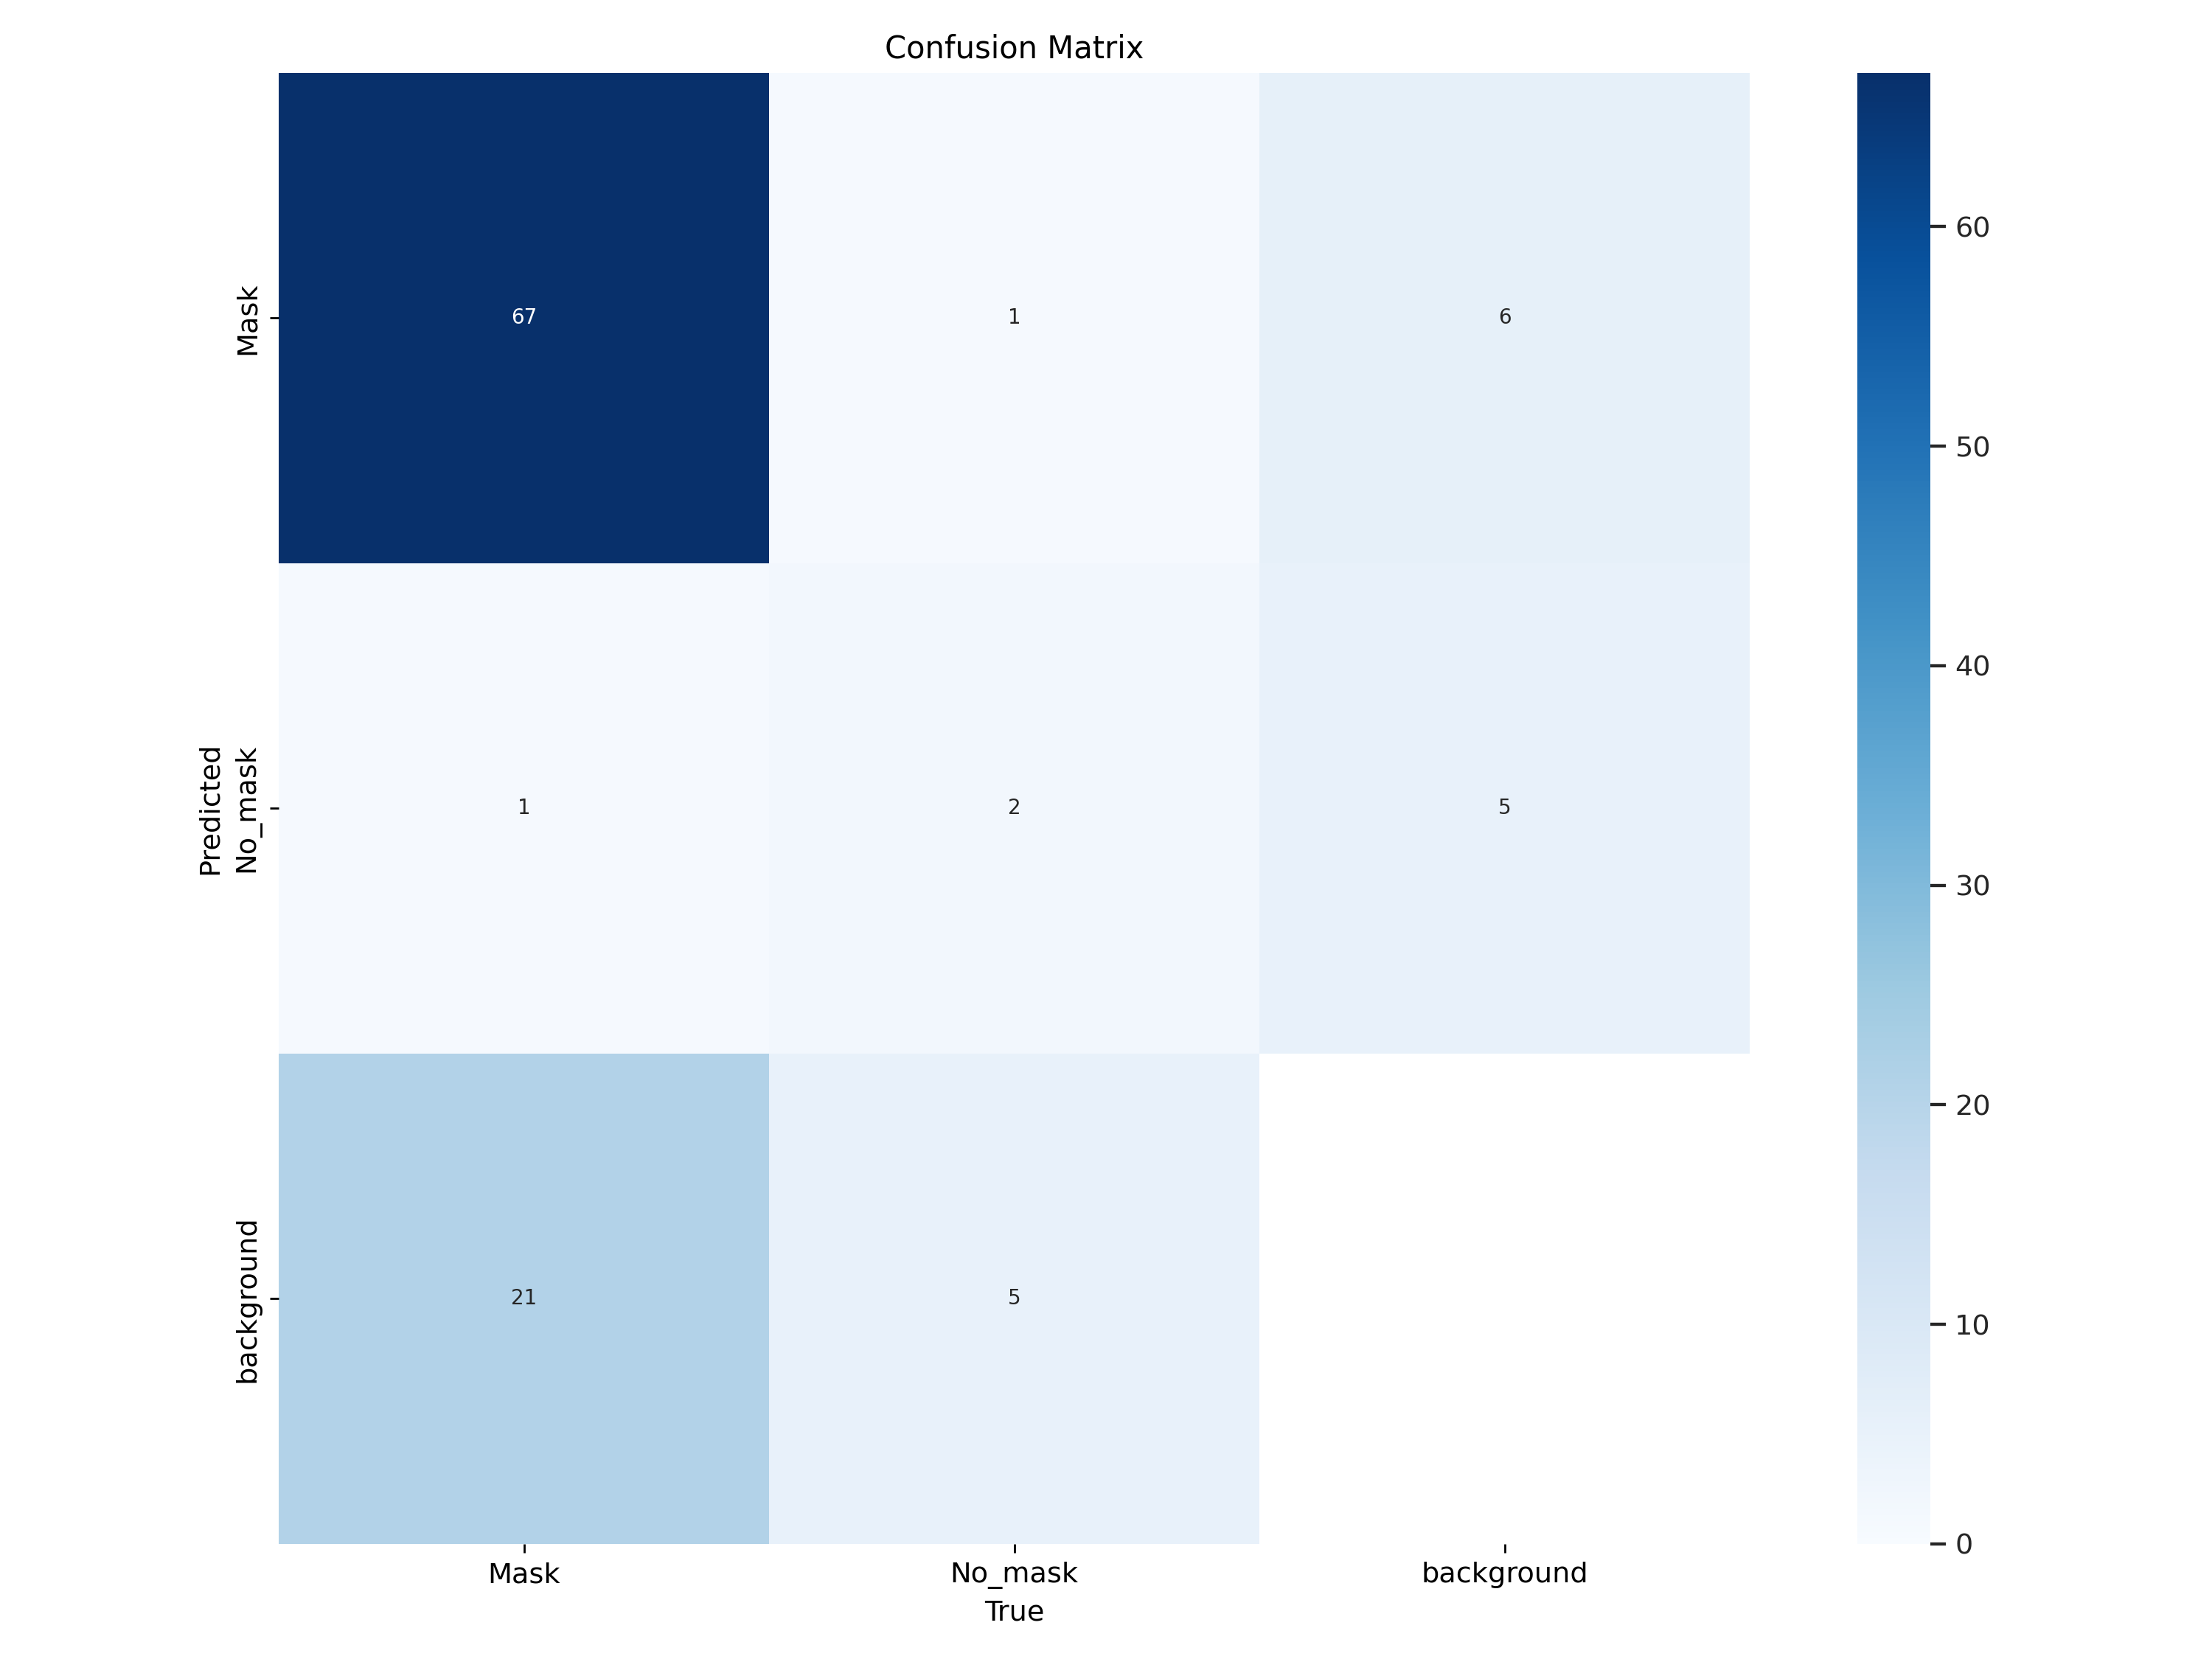

In [19]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

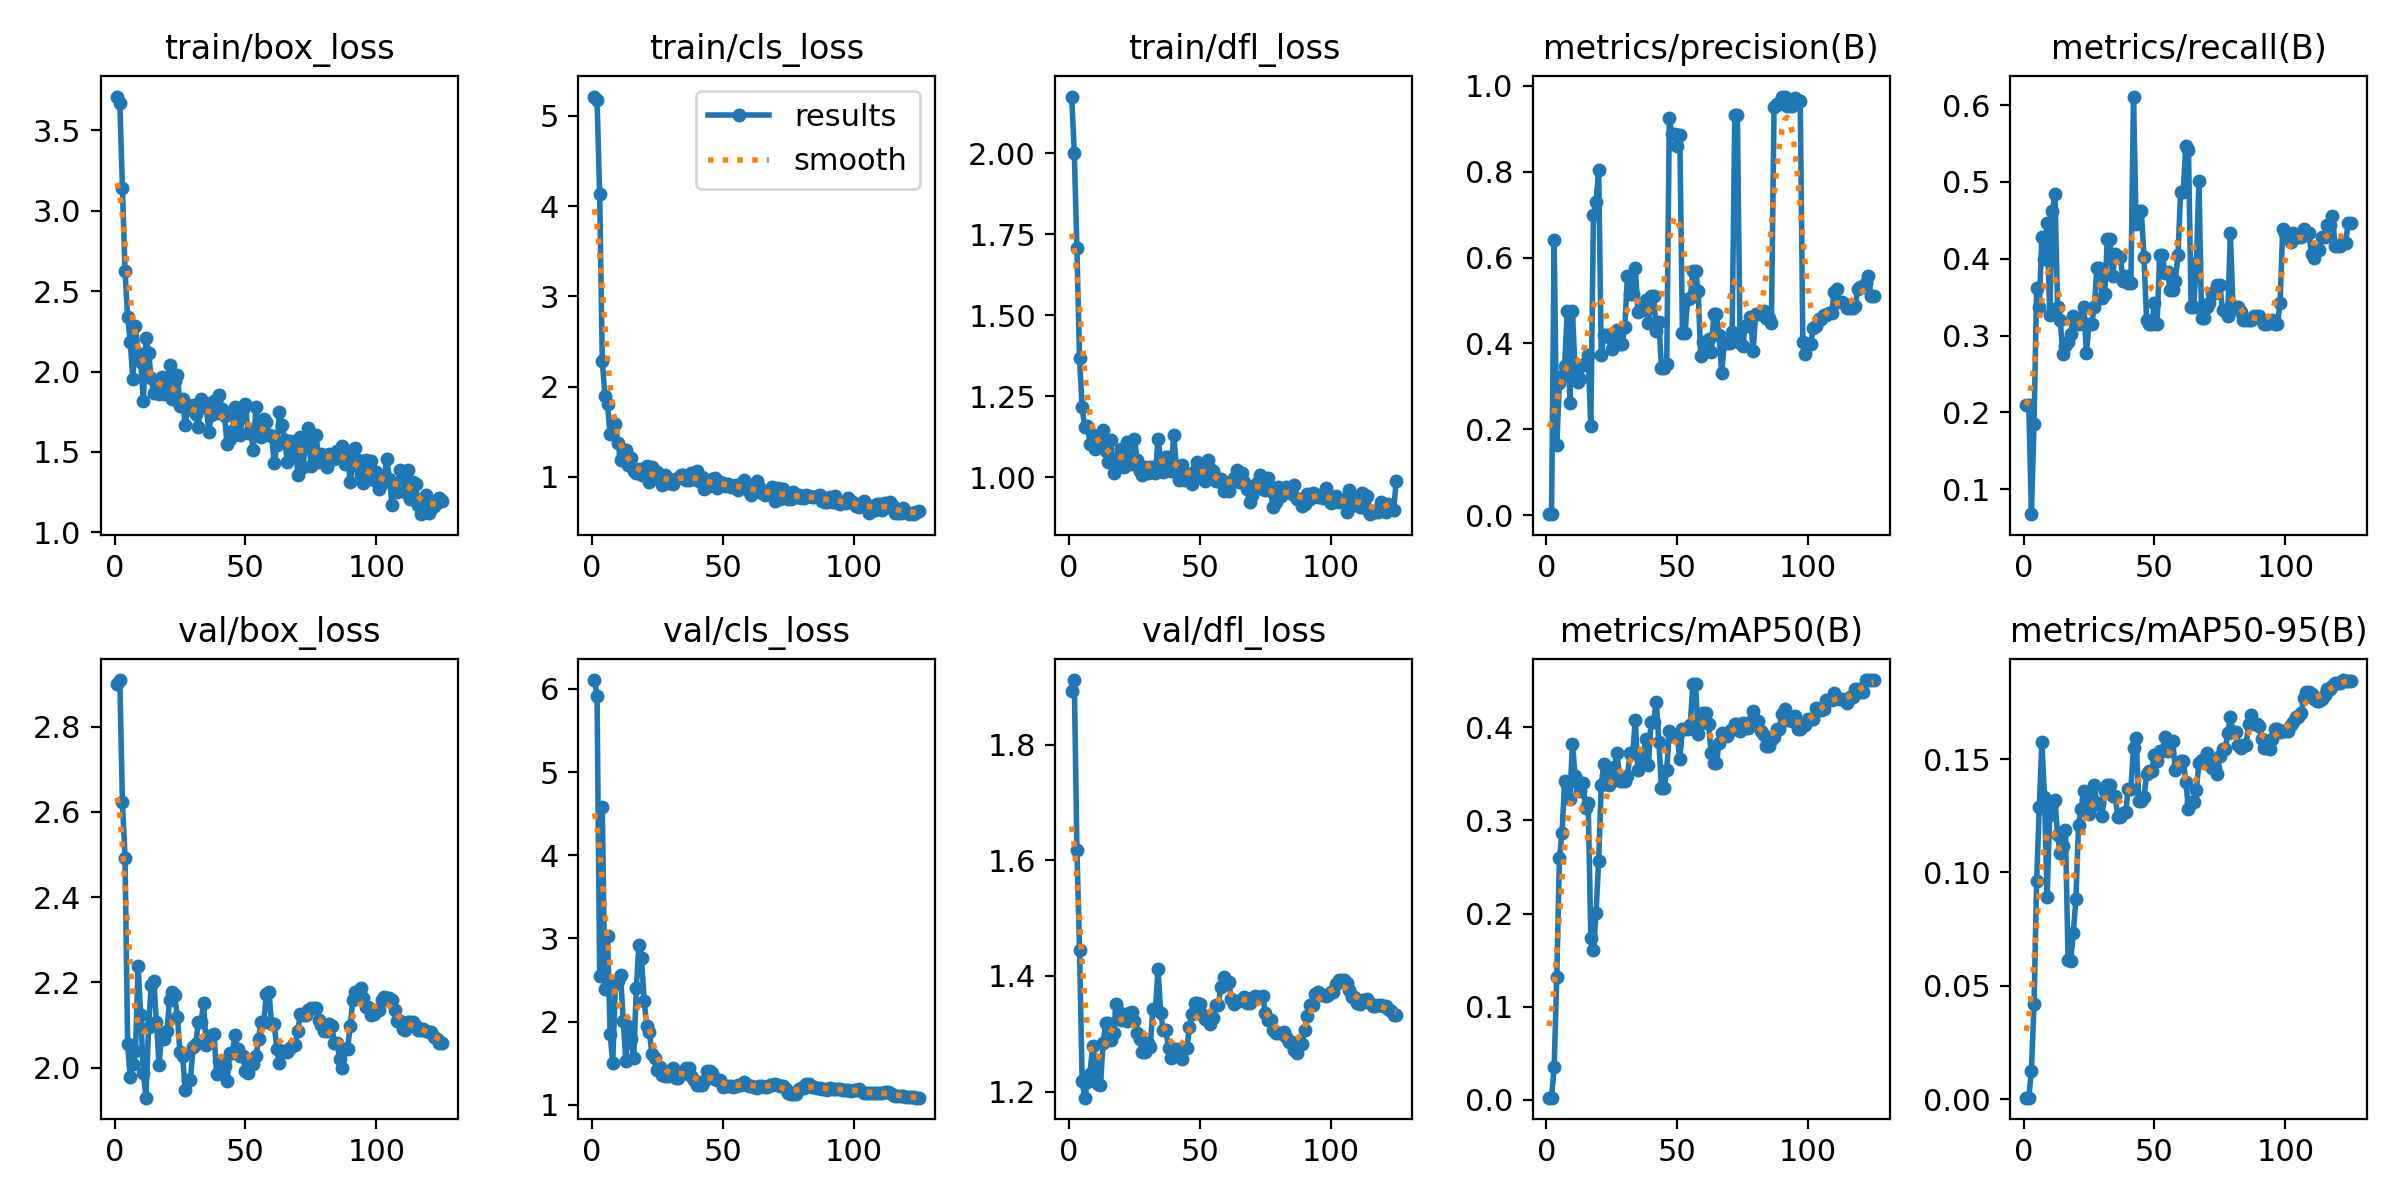

In [20]:
Image(filename='runs/detect/train3/results.png', width=600)

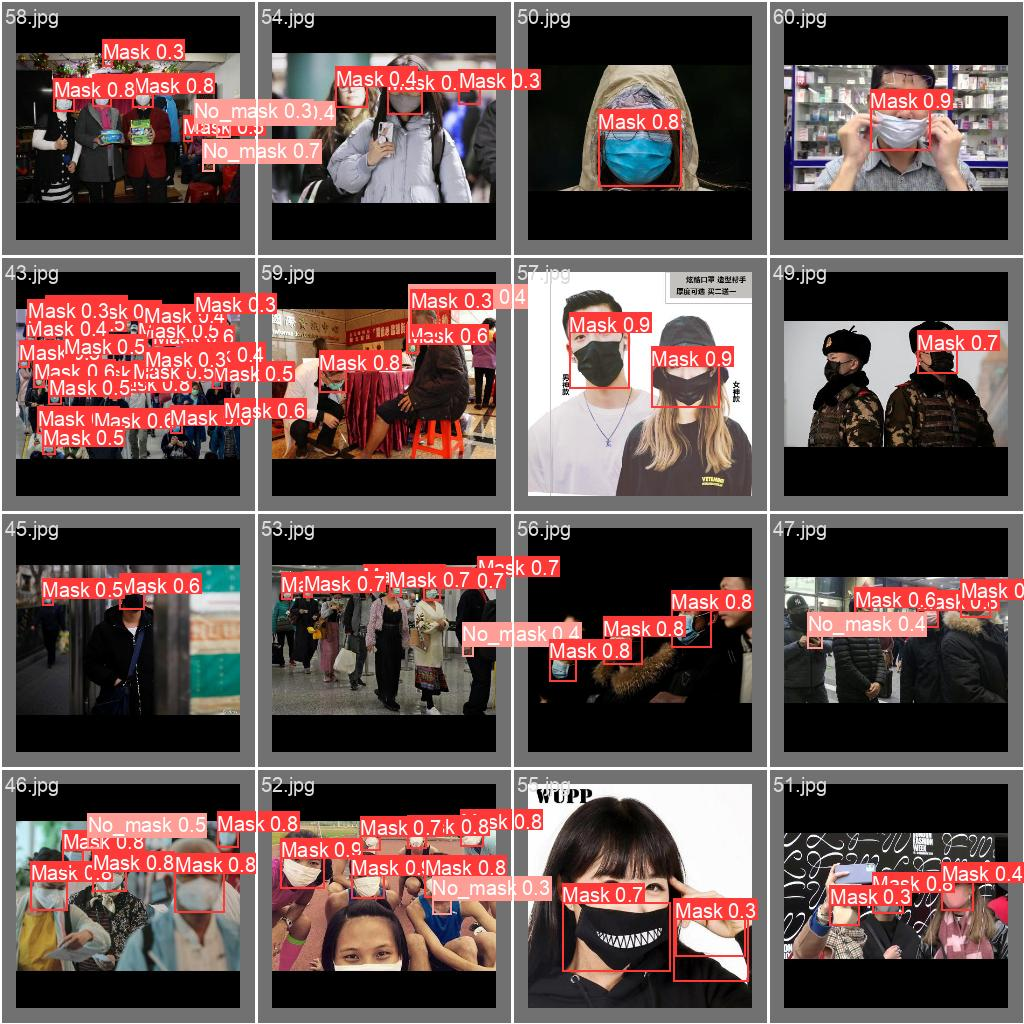

In [21]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

In [22]:
#validation
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv8/data/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.01s/it]
                   all         20         97      0.539      0.422      0.451      0.185
                  Mask         20         89       0.94      0.719      0.861      0.347
               No_mask         20          8      0.138      0.125     0.0404     0.0232
Speed: 0.3ms preprocess, 39.1ms inference, 0.0ms loss, 47.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [23]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/20 /content/drive/MyDrive/YOLOv8/data/test/images/41.jpg: 224x224 1 Mask, 8.0ms
image 2/20 /content/drive/MyDrive/YOLOv8/data/test/images/42.jpg: 224x224 1 Mask, 7.6ms
image 3/20 /content/drive/MyDrive/YOLOv8/data/test/images/43.jpg: 224x224 25 Masks, 7.9ms
image 4/20 /content/drive/MyDrive/YOLOv8/data/test/images/44.jpg: 224x224 (no detections), 8.0ms
image 5/20 /content/drive/MyDrive/YOLOv8/data/test/images/45.jpg: 224x224 2 Masks, 7.6ms
image 6/20 /content/drive/MyDrive/YOLOv8/data/test/images/46.jpg: 224x224 6 Masks, 1 No_mask, 8.0ms
image 7/20 /content/drive/MyDrive/YOLOv8/data/test/images/47.jpg: 224x224 2 Masks, 1 No_mask, 7.6ms
image 8/20 /content/drive/MyDrive/YOLOv8/data/test/images/48.jpg: 224x224 1 Mask, 7.5ms
image 9/20 /content/drive/MyDrive/YOLOv8/data/test/images/49.jpg: 224x224 1 Mask, 7.6ms
im

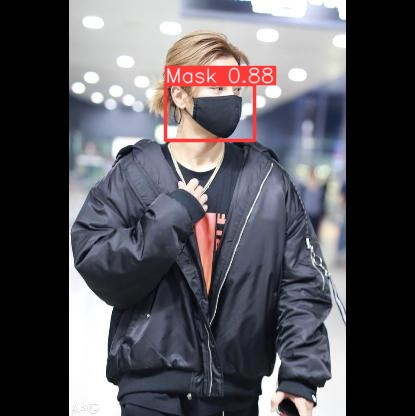

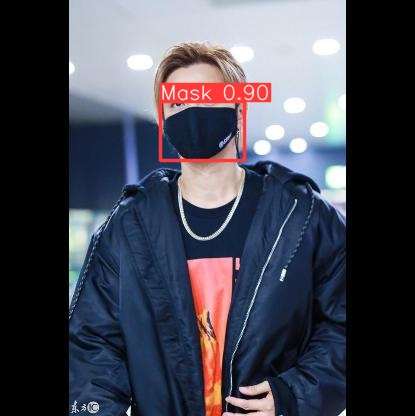

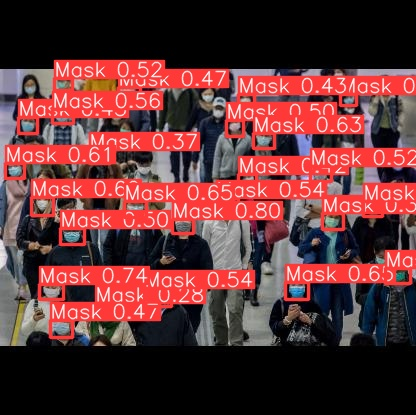

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")


In [25]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLOv8/masked_vid.mp4


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 12 Masks, 220.4ms
video 1/1 (2/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 11 Masks, 8.4ms
video 1/1 (3/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 11 Masks, 7.1ms
video 1/1 (4/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 10 Masks, 7.7ms
video 1/1 (5/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 10 Masks, 7.1ms
video 1/1 (6/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 12 Masks, 7.3ms
video 1/1 (7/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 11 Masks, 7.3ms
video 1/1 (8/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 11 Masks, 8.1ms
video 1/1 (9/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 12 Masks, 

In [26]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLOv8/mm.mp4


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 2 Masks, 3 No_masks, 102.0ms
video 1/1 (2/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 2 Masks, 3 No_masks, 10.2ms
video 1/1 (3/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 2 Masks, 3 No_masks, 11.1ms
video 1/1 (4/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 2 Masks, 3 No_masks, 11.2ms
video 1/1 (5/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 2 Masks, 3 No_masks, 11.0ms
video 1/1 (6/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 2 Masks, 3 No_masks, 11.8ms
video 1/1 (7/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 2 Masks, 3 No_masks, 10.4ms
video 1/1 (8/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 2 Masks, 3 No_masks, 11.0ms
video 1/1 (9/337) /content/drive/MyDrive/YOLOv8/mm.

In [27]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLOv8/msn.mp4


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 5 No_masks, 105.7ms
video 1/1 (2/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 5 No_masks, 16.1ms
video 1/1 (3/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 6 No_masks, 11.8ms
video 1/1 (4/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 5 No_masks, 25.7ms
video 1/1 (5/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 5 No_masks, 10.2ms
video 1/1 (6/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 5 No_masks, 12.6ms
video 1/1 (7/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 5 No_masks, 13.5ms
video 1/1 (8/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 6 No_masks, 17.0ms
video 1/1 (9/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 6 No_masks, 11.9ms
video 1/1 (10/414) /content/dri

In [29]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLOv8/ttt.mp4


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 111.9ms
video 1/1 (2/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 16.1ms
video 1/1 (3/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 18.3ms
video 1/1 (4/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 27.8ms
video 1/1 (5/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 26.6ms
video 1/1 (6/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 17.8ms
video 1/1 (7/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 9.8ms
video 1/1 (8/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 12.0ms
video 1/1 (9/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 9.8ms
video 1/1 (10/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 M